In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


In [37]:
df = pd.read_parquet("../data/btcusd_ready_classy.parquet")

In [38]:
df.dropna(inplace=True)
df = df[50000:]

In [39]:
split = int(len(df) * 0.6)
train = df.iloc[:split]
test = df.iloc[split:]

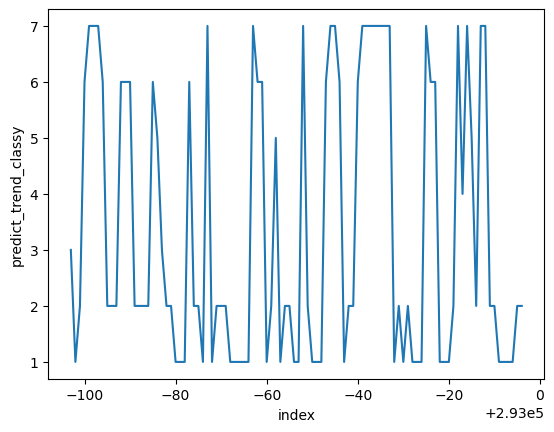

In [40]:
train_reset = train.reset_index()
sns.lineplot(data=train_reset[-100:], x='index', y='predict_trend_classy')
plt.show()

In [41]:
train_y = train[['predict_trend_classy']]
train_y = train_y.astype(int) - 1
train_x = train.drop(columns=['predict_trend_classy', 'predict_trend'])
test_y = test[['predict_trend_classy']]
test_y = test_y.astype(int) - 1
test_x = test.drop(columns=['predict_trend_classy', 'predict_trend'])

/opt/anaconda3/envs/Universal/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:53:14] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


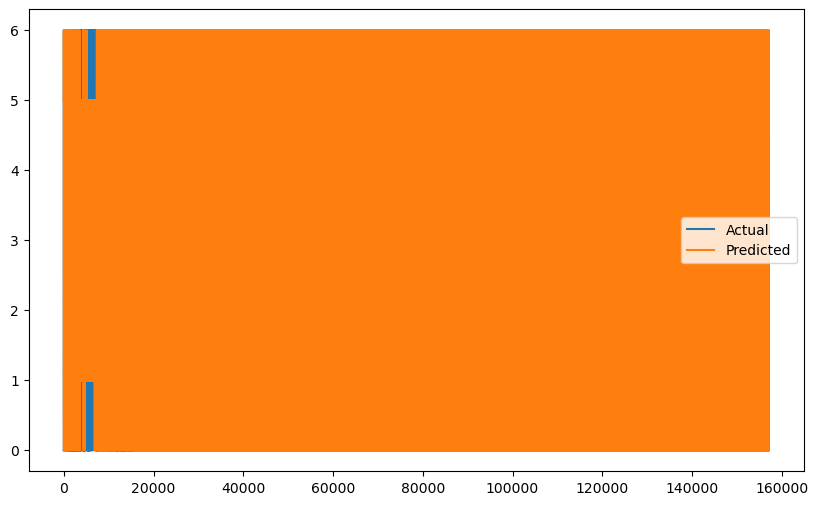

In [ ]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42, verbose=1)
# Train the model
model.fit(train_x, train_y)

# Make predictions
y_pred = model.predict(test_x)




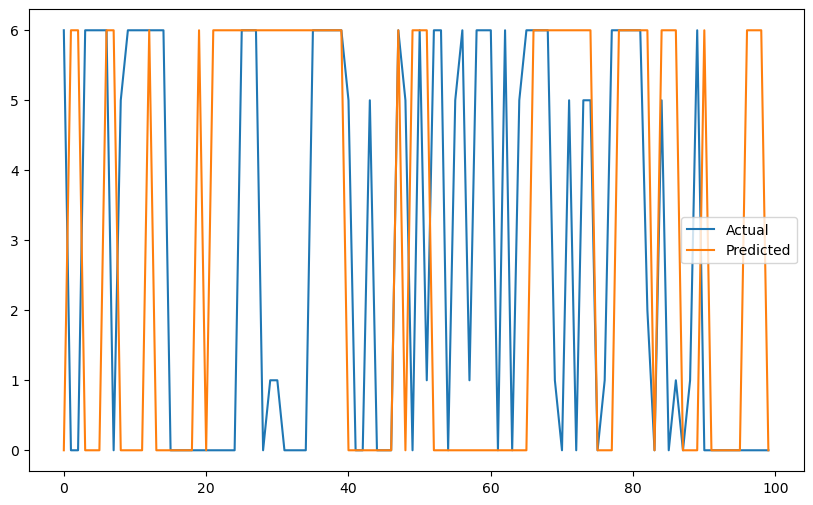

In [44]:
# Plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_y[-100:].values, label='Actual')
plt.plot(y_pred[-100:], label='Predicted')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.35
